<a href="https://colab.research.google.com/github/nayanikab20/ML-algorithms/blob/main/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [5]:
# loading dataset into a dataframe

wine=load_wine()

X = pd.DataFrame(wine.data, columns=wine.feature_names)
Y = pd.Categorical.from_codes(wine.target, wine.target_names)

In [6]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [7]:
df=X.join(pd.Series(Y, name='Class'))

In [8]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [26]:
class_feature_means = pd.DataFrame(columns=wine.target_names)
for c, rows in df.groupby('Class'):
    class_feature_means[c] = rows.mean()

class_feature_means

,class_0,class_1,class_2
alcohol,13.744746,12.278732,13.153750
malic_acid,2.010678,1.932676,3.333750
ash,2.455593,2.244789,2.437083
alcalinity_of_ash,17.037288,20.238028,21.416667
magnesium,106.338983,94.549296,99.312500
total_phenols,2.840169,2.258873,1.678750
flavanoids,2.982373,2.080845,0.781458
nonflavanoid_phenols,0.290000,0.363662,0.447500
proanthocyanins,1.899322,1.630282,1.153542
color_intensity,5.528305,3.086620,7.396250


In [41]:
within_class_scatter_matrix=np.zeros((13,13))

for classes, rows in df.groupby('Class'):
  rows=rows.drop(['Class'], axis=1) 
  s = np.zeros((13,13))

  for index, row in rows.iterrows():
    x, mc = row.values.reshape(13,1), class_feature_means[classes].values.reshape(13,1)
        
    s += (x - mc).dot((x - mc).T)
    assert s.shape == (13,13)
    
    within_class_scatter_matrix += s



In [50]:
feature_means = df.mean()
between_class_scatter_matrix = np.zeros((13,13))
for c in class_feature_means:    
    n = len(df.loc[df['Class'] == c].index)
    
    mc, m = class_feature_means[c].values.reshape(13,1), feature_means.values.reshape(13,1)
    
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)

alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
dtype: float64


In [51]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))


In [52]:
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])

eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))

0.2815779062784266
0.13792561974216477
2.1488578287755778e-17
2.1488578287755778e-17
1.939270479015945e-17
1.939270479015945e-17
1.3301211148737774e-17
1.3301211148737774e-17
1.2326939035286387e-17
4.9880520946975355e-18
3.1745979422486077e-18
1.869821557199728e-18
0.0
Explained Variance
Eigenvector 0: 0.6712170191976058
Eigenvector 1: 0.3287829808023942
Eigenvector 2: 5.12238323515331e-17
Eigenvector 3: 5.12238323515331e-17
Eigenvector 4: 4.622775158559109e-17
Eigenvector 5: 4.622775158559109e-17
Eigenvector 6: 3.17070306295468e-17
Eigenvector 7: 3.17070306295468e-17
Eigenvector 8: 2.938458980838535e-17
Eigenvector 9: 1.1890369890365822e-17
Eigenvector 10: 7.567511940514136e-18
Eigenvector 11: 4.457224888994015e-18
Eigenvector 12: 0.0


In [58]:
w_matrix = np.hstack((pairs[0][1].reshape(13,1), pairs[1][1].reshape(13,1))).real
print(w_matrix)

[[ 4.78613580e-02  2.08200530e-01]
 [-5.33979428e-02  1.14665448e-01]
 [ 1.22647124e-01  6.82869444e-01]
 [-4.73524842e-02 -4.54383821e-02]
 [ 2.26325222e-03 -6.78679390e-04]
 [-2.20279613e-01 -2.53847483e-02]
 [ 5.40859473e-01 -1.20783289e-01]
 [ 6.85984244e-01 -6.14844501e-01]
 [-1.31567307e-01 -6.81942103e-02]
 [-9.73951452e-02  7.13086024e-02]
 [ 1.93342100e-01 -2.63283244e-01]
 [ 3.19005262e-01  5.29905874e-02]
 [ 7.04269493e-04  6.36089717e-04]]


In [59]:
X_lda = np.array(X.dot(w_matrix))

In [61]:
le = LabelEncoder()
y = le.fit_transform(df['Class'])

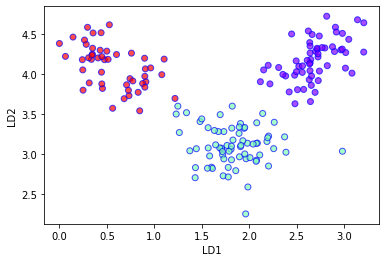

In [62]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [ ]:
d